The question that will be examined in this notebook can be summarized in the next phrase:

How can we predict the price of using Airbnb services in Seattle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



df_list = pd.read_csv(r'C:\Users\5570 i5\Desktop\Udacity\Project 1\df_list.csv')
df_list.head()

,id,host_response_time,reviews_per_month,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,has_availability_bool,requires_license_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,price_dollar,weekly_price_dollar,monthly_price_dollar,security_deposit_dollar,cleaning_fee_dollar,extra_people_dollar,host_response_rate_perc
0,241032,within a few hours,4.07,Queen Anne,3.0,3.0,Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,True,False,False,False,False,True,85.0,NaN,NaN,NaN,NaN,NaN,96.0
1,953595,within an hour,1.48,Queen Anne,6.0,6.0,Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,True,False,False,True,True,True,150.0,1000.0,3000.0,100.0,40.0,40.0,98.0
2,3308979,within a few hours,1.15,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,True,False,False,False,False,True,975.0,NaN,NaN,1000.0,300.0,300.0,67.0
3,7421966,NaN,NaN,Queen Anne,1.0,1.0,Queen Anne,"Seattle, WA",47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,1125,6 months ago,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,True,False,False,False,False,False,100.0,650.0,2300.0,NaN,NaN,NaN,NaN
4,278830,within an hour,0.89,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,6,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,True,False,False,False,False,False,450.0,NaN,NaN,700.0,125.0,125.0,100.0


The purpose of this part of analysis is to explore how and which factors impact the price. 
Best tool that can reveal us these factors is to fit a linear regression model with "price" as the  response variable.

Let's have a first look at column price which represent the cost of Airbnb services in Seattle

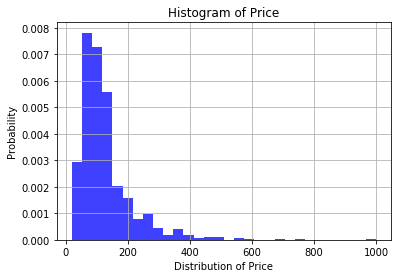

In [2]:
plt.figure(figsize=(6,4))

plt.hist(df_list.price_dollar, 30, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Distribution of Price')
plt.ylabel('Probability')
plt.title('Histogram of Price')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(60, 100)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

From the above graph we observe right skewed distribution for Price. The majority or prices can be found in lower than $200 values.

We will take the logarithm of the price to remove that skewness

C:\python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


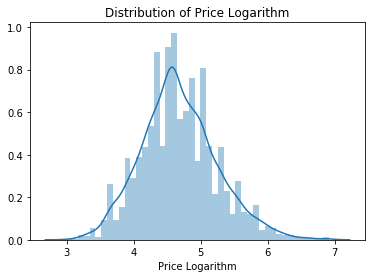

In [3]:
df_list['log_price_dollar']=np.log(df_list.price_dollar)

g=sns.distplot(df_list.log_price_dollar)

g.set_title('Distribution of Price Logarithm')
g.set(xlabel="Price Logarithm")
plt.show()

Let's try to find if there are columns with same values. This causes serious problems in modelling process. 
Cases with variables with the same values is multicollinearity. This breaks the assumption of linear model 

In [4]:
from itertools import combinations

[(i, j) for i,j in combinations(df_list, 2) if df_list[i].equals(df_list[j])]

[('host_listings_count', 'host_total_listings_count'),
 ('cleaning_fee_dollar', 'extra_people_dollar')]

So host_listings_count and host_total_listings_count have the same values in each row. As well variables cleaning_fee_dollar and extra_people_dollar have the same values.

So 1 variable of each pair must be removed from Dataframe

Now, we will search for columns in dataset which has the same value in each row:

In [5]:
uniques = df_list.apply(lambda x: x.nunique())
uniques[uniques==1]

has_availability_bool    1
requires_license_bool    1
dtype: int64

We will proceed in modelling steps.


1st thing to do is to drop any variable which is not going to be used in model. So along with variables:
- host_total_listings_count 
and
- extra_people_dollar

which had the same values with host_listings_count & cleaning_fee_dollar correspondingly and

variables:
- has_availability_bool
and 
- requires_license_bool

which have 1 unique value for the entire column,

we remove as redundants the following columns

1) host_neighbourhood
2) neighbourhood_group_cleansed
3) smart_location
4) latitude
5) longitude
6) amenities
7) calendar_updated
8) first_review
9) last_review
10) price_dollar
11) id

In [6]:
df_list = df_list.drop([
'has_availability_bool',
'requires_license_bool',
'host_total_listings_count',
'extra_people_dollar',
'id',
'host_neighbourhood',
'neighbourhood_group_cleansed',
'smart_location',
'latitude',
'longitude',
'amenities',
'calendar_updated',
'first_review',
'last_review',
'weekly_price_dollar',
'monthly_price_dollar',
'price_dollar'
], axis=1)

df_list.head()

,host_response_time,reviews_per_month,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,within a few hours,4.07,3.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,False,False,False,True,NaN,NaN,96.0,4.442651
1,within an hour,1.48,6.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,False,True,True,True,100.0,40.0,98.0,5.010635
2,within a few hours,1.15,2.0,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.0,6.882437
3,NaN,NaN,1.0,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,False,False,False,False,NaN,NaN,NaN,4.605170
4,within an hour,0.89,2.0,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,False,False,False,False,700.0,125.0,100.0,6.109248


First thing to do is to explore our data. 
Lets have a look in our dataset and measure the percentage of missing values for each variable

In [7]:
percent_of_null = 1-(df_list.count(axis=0)/df_list.shape[0])

print("The percentage of missing values for each of",df_list.shape[1],"columns in df_list dataset are: ")
print("\n")
print(percent_of_null)


The percentage of missing values for each of 40 columns in df_list dataset are: 


host_response_time                       0.136983
reviews_per_month                        0.164222
host_listings_count                      0.000524
property_type                            0.000262
room_type                                0.000000
accommodates                             0.000000
bathrooms                                0.004191
bedrooms                                 0.001572
beds                                     0.000262
bed_type                                 0.000000
square_feet                              0.974594
guests_included                          0.000000
minimum_nights                           0.000000
maximum_nights                           0.000000
availability_30                          0.000000
availability_60                          0.000000
availability_90                          0.000000
availability_365                         0.000000
number_of_reviews

So from 45 variables in our dataset, 41 have very low proportion of missing values (<20%).

2 have relatively small percentage of missing values, nearly at 25-26%. These columns are:cleaning_fee_dollar & extra_people_dollar.

Variable security_deposit_dollar has significanlty big percentage of missing values, 51%. 

These 3 columns has information about some extra cost that some hosts require from their customers. Missing values in these cases can be imputed with zero. Because missing value means no extra cost.

Column square_feet has very big percentage of missing values, 97%. It will be removed from dataset because it is neither useful nor practical to impute such high percentage of missing values.


For the rest of the variables, we will impute missing values with the average of each respective column regarding float and integer ones. 
Boolean columns do not have any missing values, so no imputation actions will be applied on them
From categorical variables, dummy variables will be created for every attribute in them, missing values included. 

We are dropping square_feet column from our dataset

In [8]:
df_list = df_list.drop([
'square_feet'
], axis=1)

df_list.head()

,host_response_time,reviews_per_month,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,within a few hours,4.07,3.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,False,False,False,True,NaN,NaN,96.0,4.442651
1,within an hour,1.48,6.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,False,True,True,True,100.0,40.0,98.0,5.010635
2,within a few hours,1.15,2.0,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.0,6.882437
3,NaN,NaN,1.0,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,False,False,False,False,NaN,NaN,NaN,4.605170
4,within an hour,0.89,2.0,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,False,False,False,False,700.0,125.0,100.0,6.109248


Before starting imputing any missing values, we will drop any row where "log_price" (which will the response variable) has missing values

In [9]:
f1=df_list.shape[0]
print("Before dropping any row with missing values in column 'log_price_dolar', the number of rows was:", f1)
df_list=df_list.dropna(subset=['log_price_dollar'], axis=0)

if df_list.shape[0]==f1:
    print("There was not any missing value for variable 'log_price_dolar' so no row was removed")
else:
    print("After dropping rows with missing values in column 'log_price_dolar', the number of rows is:", df_list.shape[0])


Before dropping any row with missing values in column 'log_price_dolar', the number of rows was: 3818
There was not any missing value for variable 'log_price_dolar' so no row was removed


Impute missing values with zero for columns bearing information for extra costs:
1) security_deposit_dollar	
2) cleaning_fee_dollar


In [10]:
cost_vars = df_list[['security_deposit_dollar','cleaning_fee_dollar']]

for col in cost_vars:
    df_list[col].fillna(0, inplace=True)


df_list[['security_deposit_dollar','cleaning_fee_dollar']]

,security_deposit_dollar,cleaning_fee_dollar
0,0.0,0.0
1,100.0,40.0
2,1000.0,300.0
3,0.0,0.0
4,700.0,125.0
5,0.0,40.0
6,150.0,0.0
7,150.0,25.0
8,0.0,0.0
9,100.0,40.0


Now, we will impute missing values in the rest of integer and float type columns
with the respective average of each column

In [11]:
num_vars = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_list[col].fillna((df_list[col].mean()), inplace=True)
    
df_list.select_dtypes(include=['float', 'int'])

,reviews_per_month,host_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,4.070000,3.0,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,0.0,96.000000,4.442651
1,1.480000,6.0,1.0,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.0,40.0,98.000000,5.010635
2,1.150000,2.0,4.5,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1000.0,300.0,67.000000,6.882437
3,2.078919,1.0,1.0,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,0.0,0.0,94.886798,4.605170
4,0.890000,2.0,2.0,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,700.0,125.0,100.000000,6.109248
5,2.450000,1.0,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,40.0,94.886798,4.787492
6,2.460000,1.0,1.0,1.0,1.0,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.0,0.0,100.000000,4.382027
7,4.730000,5.0,1.0,1.0,1.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,150.0,25.0,100.000000,4.094345
8,1.220000,1.0,1.0,1.0,1.0,97.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,0.0,0.0,94.886798,4.499810
9,1.550000,6.0,1.0,1.0,1.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.0,40.0,98.000000,5.010635


Before we move into the modelling step, we will transform categorical variables into dummies for each of their attributes, for missing values, too.

This is being done because the corresponding packages in python cannot utilize and use information from categorical variables.

So we transform categorical columns into dummy variables for every corresponding attribute in every column. In that way we have transformed and all the necessary infromation from categorical vriables int onumericasl ones.

The risk under this method is to create a big number of variables which will create problems of overfitting in modelling results.

In [12]:
def create_dummy_df(df, dummy_na):
    '''
    This function will be used in order to create dummy variables
    for each categorical variable that is included in the decalred dataframe and drops the categorical variables:
    df: Dataframe in which we will create dummy variables for each categorical variables
    dummy_na: It is a boolean variable. If it is declared as True it will create a dummy variable for missing values, too.
    '''
    
    i=-1
    cat_cols=df.select_dtypes(include=['object']).columns.get_values().tolist()
    for column in cat_cols:
        i=i+1
        df=pd.merge(df.drop([column],axis=1), 
                pd.get_dummies(df[[column]], prefix=cat_cols[i], drop_first=False,dummy_na=dummy_na), 
                left_index=True, right_index=True)
     
    return df

In [13]:
df = create_dummy_df(df_list, dummy_na=False) 
df.head(6)

,reviews_per_month,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,4.070000,3.0,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,False,True,True,True,False,False,False,True,0.0,0.0,96.000000,4.442651,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1.480000,6.0,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,True,True,True,True,False,True,True,True,100.0,40.0,98.000000,5.010635,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1.150000,2.0,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.000000,6.882437,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,2.078919,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,False,True,True,True,False,False,False,False,0.0,0.0,94.886798,4.605170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,0.890000,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,False,True,True,True,False,False,False,False,700.0,125.0,100.000000,6.109248,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,2.450000,1.0,2,1.0,1.0,1.0,1,1,6,0,0,27,302,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,False,True,True,True,False,False,False,False,0.0,40.0,94.886798,4.787492,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


Let's measure how many variables we have available in our final dataset, df, and examine if this number might create overfitting problems

In [14]:
print("Number of columns in the final dataset df is:", df.shape[1])
print("Number of rows in the final dataset df is:", df.shape[0])

Number of columns in the final dataset df is: 65
Number of rows in the final dataset df is: 3818


So there is no risk for overfitting due to the number of independent variables.

Now we will create a function which will fit a linear model and then it will print the output:

In [15]:
import statsmodels.api as sm
from scipy import stats

def linear_model_function(X,y,normalize_bool):
    '''
    PART1 (fit the model)
    This function fits a linear model in the declared data.
    Initially it splits the data in train and test data with an proportion of train/set: 7/3.
    After that it fits the model on the train data and creates the prediction on the test data.
    Following that, it calculates a score of good prediction with an r_square between prediction of response variable
    on test data and actual values of response variable in test data.
    
    PART 2 (produce statistics table of model fitted above)
    Initially we create two series, the first contains the coefficients of the model and the second the prediction of the model
    on the train data
    After that we create a table with:
    i) the first columns has all values as 1 and it coresponds to the constant of the model
    ii) columns with the vectors of the values of each variable was used in the model   
    Having that we can compute the Mean Square Error of the model (MSE).
    This helps us to create series:
    i)variance and standard error of the estimated parameters (var_b, sd_b), 
    ii) the values of t-test functions for each estimated parameter (ts_b) and their correspondent p-values 
    The above are calculated at their 3rd decimal point.
    Finally we create a new DataFrame which has as columns:
    i) the predicted paramters of the model, 
    ii) standard deviation of each parameter,
    iii) t-test values and
    iv) p-values
    '''
    
    #PART 1
    #Split data in train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=43) 
    #Initiate a linear model
    lm = LinearRegression(normalize=normalize_bool) # I have logarithmic number for price_dollar so I will not normalize
    #Fit the model on train data
    lm.fit(X_train, y_train) #Fit
    #Calculate the prediction on test data
    y_test_preds =lm.predict(X_test)
    #Calculate the r_square between prediction and actual values
    rsquared_score = r2_score(y_test, y_test_preds)#r2_score
    
    
    #PART 2
    # Found the code below here: 
    # https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
    
    #Paramters and predictions
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X_train)

    #Table with values of each independent variable in the model and MSE
    newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
    MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

    #Variance, standard deviation, t-test value for parameters & p-values
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
    
    #Rounding variables
    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    #Dataframe with parameters, standard deviation of parameters, -test values & p-values
    Output = pd.DataFrame()
    Output["Coefficients"],Output["Standard Errors"],Output["t values"],Output["Probabilites"] = [params,sd_b,ts_b,p_values]
    f=X_train.columns.get_values().tolist()
    f.insert(0,'constant')
    Output.index=f
    
    
    return Output


In addition to the above, we will create an extra function, which will remove variables for which the paramters have
p-value>0.05.
This process will be iterated until we end up with a model with all of its parameters have p-value<0.05

In [16]:
def end_with_only_significant_vars():
    '''
    This function will built a model in the dataframe df
    with response variable: 'log_price_dollar' and independent variable the rest of columns in the df dataframe.
    The process will be iterated until all variables that will remain in the model are significant (p-value<0.05)
    '''
    #Set up the independent and dependent variables
    X = df.drop(['log_price_dollar'],axis=1).astype(float)
    y = df['log_price_dollar'].astype(float)
    
    
    #We fit a model in the above data
    Output=linear_model_function(X,y,False)
    
    #Iterate the process of fitting a linear model, until all variables in the model have p-value<0.05
    while Output[1:][Output[1:].Probabilites>0.05].shape[0]>0:
        drop_var=Output[1:][Output[1:].Probabilites>0.05].index.get_values().tolist()
        X = X.drop(drop_var,axis=1).astype(float)
        Output=linear_model_function(X,y,False)    
    return Output, X, y
    

In [17]:
Output, X, y=end_with_only_significant_vars()
Output

C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in sqrt
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,Coefficients,Standard Errors,t values,Probabilites
constant,3.3970,0.155,21.953,0.000
reviews_per_month,-0.0200,0.005,-4.011,0.000
accommodates,0.1246,0.006,19.210,0.000
bedrooms,0.0390,0.013,2.901,0.004
review_scores_accuracy,0.0624,0.014,4.394,0.000
review_scores_location,0.1195,0.014,8.644,0.000
review_scores_value,-0.0883,0.013,-6.572,0.000
calculated_host_listings_count,-0.0107,0.001,-8.191,0.000
host_is_superhost_bool,0.0927,0.019,4.758,0.000
host_acceptance_rate_bool,-0.1228,0.027,-4.548,0.000


ANSWERING THE BASIC QUESTION OF THIS NOTEBOOK:
How will we predict the price of using Airbnb services in Seattle?

Having fitted a model to our data, now we can predict that price.

So we will create a data frame having:

1) The actual price of Airbnb services and
2) The predicted prices



In [18]:
Output['Coefficients']

constant                                 3.3970
reviews_per_month                       -0.0200
accommodates                             0.1246
bedrooms                                 0.0390
review_scores_accuracy                   0.0624
review_scores_location                   0.1195
review_scores_value                     -0.0883
calculated_host_listings_count          -0.0107
host_is_superhost_bool                   0.0927
host_acceptance_rate_bool               -0.1228
cleaning_fee_dollar                      0.0030
host_response_time_within a day         -0.0793
host_response_time_within a few hours   -0.0634
host_response_time_within an hour       -0.1216
Name: Coefficients, dtype: float64

In [19]:
#Keeping only response variable and significant variables
df_data=pd.merge(X, pd.DataFrame(y), left_index=True, right_index=True)

#Creating columns which have the values of each significant independent variable multiplied with its correspondent parameter
df_data['coeff']=3.397025
df_data["coef1"]=-0.020027*df_data["reviews_per_month"]
df_data["coef2"]=0.124586*df_data["accommodates"]
df_data["coef3"]=0.038968*df_data["bedrooms"]
df_data["coef4"]=0.062429*df_data["review_scores_accuracy"]
df_data["coef5"]=0.119497*df_data["review_scores_location"]
df_data["coef6"]=-0.088268*df_data["review_scores_value"]
df_data["coef7"]=-0.010675*df_data["calculated_host_listings_count"]
df_data["coef8"]=0.092736*df_data["host_is_superhost_bool"]
df_data["coef9"]=-0.122769*df_data["host_acceptance_rate_bool"]
df_data["coef10"]=0.002990*df_data["cleaning_fee_dollar"]
df_data["coef11"]=-0.079264*df_data["host_response_time_within a day"]
df_data["coef12"]=-0.063407*df_data["host_response_time_within a few hours"]
df_data["coef13"]=-0.121602*df_data["host_response_time_within an hour"]

#We create the predicted value of logarithm of price
df_data['pred_log_price_dollar'] = df_data[["coeff",
"coef1",
"coef2",
"coef3",
"coef4",
"coef5",
"coef6",
"coef7",
"coef8",
"coef9",
"coef10",
"coef11",
"coef12",
"coef13"]].sum(axis=1)


#We create the final DataFrame which contains the answer to thw question along with the error of predictions
Result=pd.DataFrame()

Result['price']=np.exp(df_data.log_price_dollar)
Result['predicted_price']=np.exp(df_data.pred_log_price_dollar)

Result['Prediction_error']=df_data.log_price_dollar-df_data.pred_log_price_dollar
Result['Prediction_Error_in_natural_values']=np.exp(df_data.log_price_dollar)-np.exp(df_data.pred_log_price_dollar)
Result.head(10)


,price,predicted_price,Prediction_error,Prediction_Error_in_natural_values
0,85.0,86.693951,-0.019733,-1.693951
1,150.0,115.029894,0.265443,34.970106
2,975.0,710.048977,0.317104,264.951023
3,100.0,102.921815,-0.028799,-2.921815
4,450.0,206.028801,0.781232,243.971199
5,120.0,107.943058,0.105888,12.056942
6,80.0,82.283334,-0.028142,-2.283334
7,60.0,72.042793,-0.182916,-12.042793
8,90.0,86.822696,0.035942,3.177304
9,150.0,125.468929,0.178577,24.531071


Maximum real Price: 1000.000000
Minimum real Price: 20.000000
Average real Price: 127.976166
Standard Deviation for real Price: 90.250022


Average prediction error in natural values: 7.968129
Standard prediction error in natural values: 68.465983
Maximum prediction error in natural values: 894.510245
Minimum prediction error in natural values: -902.660142


Skewness for prediction error (logarithmic): 0.153400
Kurtosis for prediction error (logarithmic): 1.237537
Strd Dev for prediction error (logarithmic): 0.377118


T-test for  for prediction error (logarithmic) mean=0 : 
Ttest_indResult(statistic=-0.3029614312541864, pvalue=0.7619275094127201)


C:\python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


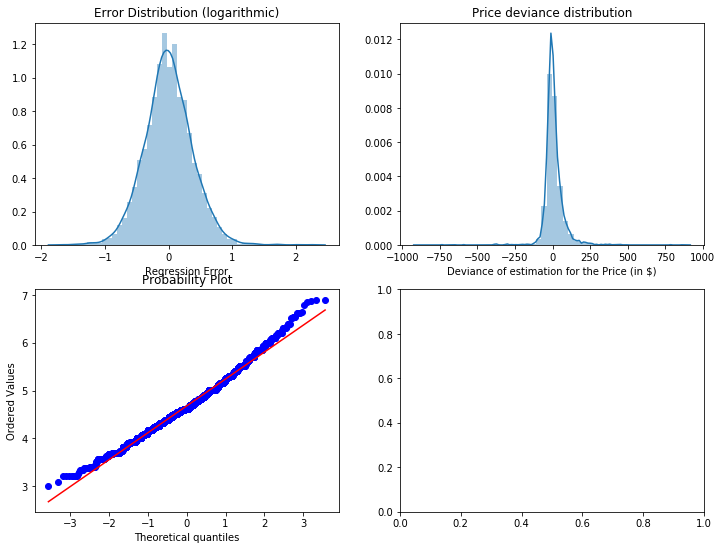

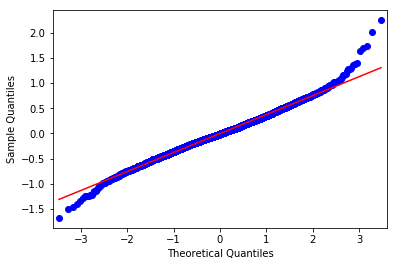

In [20]:

from scipy.stats import ttest_ind
from statsmodels.graphics.gofplots import qqplot as qq



print("Maximum real Price: %f" % Result['price'].max())
print("Minimum real Price: %f" % Result['price'].min())
print("Average real Price: %f" % Result['price'].mean())
print("Standard Deviation for real Price: %f" % Result['price'].std())

print("\n")

print("Average prediction error in natural values: %f" % Result.Prediction_Error_in_natural_values.mean())
print("Standard prediction error in natural values: %f" % Result.Prediction_Error_in_natural_values.std())
print("Maximum prediction error in natural values: %f" % Result.Prediction_Error_in_natural_values.max())
print("Minimum prediction error in natural values: %f" % Result.Prediction_Error_in_natural_values.min())

print("\n")

print("Skewness for prediction error (logarithmic): %f" % Result['Prediction_error'].skew())
print("Kurtosis for prediction error (logarithmic): %f" % Result['Prediction_error'].kurt())
print("Strd Dev for prediction error (logarithmic): %f" % Result['Prediction_error'].std())

print("\n")

print("T-test for  for prediction error (logarithmic) mean=0 : ")
print( ttest_ind(Result.Prediction_error, df_data.host_is_superhost_bool-df_data.host_is_superhost_bool))

# above column created by df_data2.host_is_superhost_bool-df_data2.host_is_superhost_bool
# represents a columns with zero value in every row

plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
g=sns.distplot(Result.Prediction_error)

g.set_title('Error Distribution (logarithmic)')
g.set(xlabel="Regression Error")



plt.subplot(2,2,2)
g2=sns.distplot(Result.Prediction_Error_in_natural_values)

g2.set_title('Price deviance distribution')
g2.set(xlabel="Deviance of estimation for the Price (in $)")




plt.subplot(2,2,3)
stats.probplot(df_data.log_price_dollar, plot=plt)

plt.subplot(2,2,4)
qq(Result.Prediction_error, line='s')

plt.show()

From the above we can assume that our model has a heteroscedasticity issue.
For this analysis, we won't search it further (examine relationships of square errors with each independent variable in order to under stand which variable-s cause that problem and run a weighted regression, using as weights the values of problematic independend variable-s).


But we could use this model to have a first clue about the prices of Airbnb services in Seattle
based on information about:

1)  Number of reviews per month
2)  Number of accomodates
3)  Number of bedrooms in each property
4)  Accuracy score rating
5)  Location score rating
6)  Average score value
7)  Count of  host's listing
8)  if the host is a superhost?
9)  Host acceptance
10)  Fee for cleaning services
11)  if host responds within few hours?
12)  if host responds within a day?
13)  if host responds within an hour?

So we multiply the coefficients:

1) -0,020027
2) 0,124586
3) 0,038968
4) 0,062429
5) 0,119497
6) -0,088268
7) -0,010675
8) 0,092736
9) -0,122769
10) 0,00299
11) -0,079264
12) -0,063407
13) -0,121602

with each corresponding variable, take the sum of all this multiplications and in the end add the constant, 3.397025.
Exponentiating this value, gives us a prediction of the price


Variables and parameters of the final model are shown in the following dataframe

In [21]:
data = [["Number of reviews in a month",-0.020027],
["Number of accomodates",0.124586],
["Number of bedrooms",0.038968],
["Accuracy score",0.062429],
["Location score",0.119497],
["Average  reviews score",-0.088268],
["Number of host listings",-0.010675],
["Is host as superhost? (1 for Yes, 0 for No)",0.092736],
["Host's acceptace",-0.122769],
["cleaning fee",0.00299],
["Does host response within a day? (1 for Yes, 0 for No)",-0.079264],
["Does host response within few hours? (1 for Yes, 0 for No)",-0.063407],
["Does host response within an hour? (1 for Yes, 0 for No)",-0.121602]
] 
  
df_vars_weights = pd.DataFrame(data, columns = ['Variables', 'Parameters']) 
df_vars_weights.set_index(df_vars_weights.Variables, inplace=True)

df_vars_weights.drop(columns=['Variables'], inplace=True)
df_vars_weights

,Parameters
Variables,
Number of reviews in a month,-0.020027
Number of accomodates,0.124586
Number of bedrooms,0.038968
Accuracy score,0.062429
Location score,0.119497
Average reviews score,-0.088268
Number of host listings,-0.010675
"Is host as superhost? (1 for Yes, 0 for No)",0.092736
Host's acceptace,-0.122769
